In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


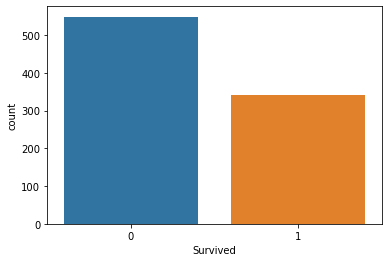

In [3]:
import seaborn as sns

sns.countplot(train['Survived'])

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
print('\nNull Values in training dataset \n{}'.format(train.isnull().sum()))
print('\nNull Values in testing dataset \n{}'.format(test.isnull().sum()))

print('Duplicated Values in training dataset {}'.format(train.duplicated().sum()))
print('Duplicated Values in testing dataset {}'.format(train.duplicated().sum()))


Null Values in training dataset 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in testing dataset 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Duplicated Values in training dataset 0
Duplicated Values in testing dataset 0


In [6]:
# Since the Embarked variable in training dataset is missing 2 values, and Embark is a categorical variable.
#Embarked has only 3 values: S, C, Q. We can fill those NAs with the most common port of embark.
print('Summary of Embarked variable \n{}'.format(train['Embarked'].value_counts()))

#We can see that 'S' is the most common port so I will fill those 2 values by 'S'
train['Embarked'].fillna(value = 'S', inplace = True)

Summary of Embarked variable 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [7]:
# For Fare variable in testing dataset, it has 1 null value. I decide to fill in a value which will keep the characteristics of this 'Fare' variable
test['Fare'].fillna(value = test.Fare.mean(), inplace = True)

In [8]:
#Now we need to fix the problem with 'Age' variable in both training and testing dataset.
#One thing we notice that in the past for 'Name' column, it contains titles (like Miss, Mr, Mrs, Master and Dr).
#Notice in testing dataset there is one person who has a 'Ms' title, I will leave her age same as Mrs' age
#We can use these title to fill in the average age for each title.
mean_age_miss = round(train[train['Name'].str.contains('Miss.', na = False)]['Age'].mean())
mean_age_mr = round(train[train['Name'].str.contains('Mr.', na = False)]['Age'].mean())
mean_age_mrs = round(train[train['Name'].str.contains('Mrs.', na = False)]['Age'].mean())
mean_age_master = round(train[train['Name'].str.contains('Master.', na = False)]['Age'].mean())
mean_age_dr = round(train[train['Name'].str.contains('Dr.', na = False)]['Age'].mean())

print('The average age for title Miss is: {}'.format(mean_age_miss))
print('The average age for title Mr is: {}'.format(mean_age_mr))
print('The average age for title Mrs is: {}'.format(mean_age_mrs))
print('The average age for title Master is: {}'.format(mean_age_master))
print('The average age for title Dr is: {}'.format(mean_age_dr))

def missing_age(name_age):
    name = name_age[0]
    age = name_age[1]
    if pd.isnull(age):
        if 'Miss.' in name:
            return mean_age_miss
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Ms.' in name:
            return mean_age_mrs
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_dr
    else:
        return age

train['Age'] = train[['Name','Age']].apply(missing_age, axis = 1)
test['Age'] = test[['Name','Age']].apply(missing_age, axis = 1)

print('\nNull Values in training dataset \n{}'.format(train.isnull().sum()))
print('\nNull Values in testing dataset \n{}'.format(test.isnull().sum()))

The average age for title Miss is: 22
The average age for title Mr is: 33
The average age for title Mrs is: 36
The average age for title Master is: 5
The average age for title Dr is: 39

Null Values in training dataset 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Null Values in testing dataset 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [9]:
train = train.fillna('U')
test = test.fillna('U')
train.head(10)
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,U,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,U,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,U,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,U,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,U,S


In [10]:
train.Cabin = train.Cabin.map(lambda x: x[0])
test.Cabin = test.Cabin.map(lambda x: x[0])
train.head(10)
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,U,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,U,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,U,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,U,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,U,S



Null Values in training dataset 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Summary of Cabin variable 
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64
Summary of Cabin variable 
U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64


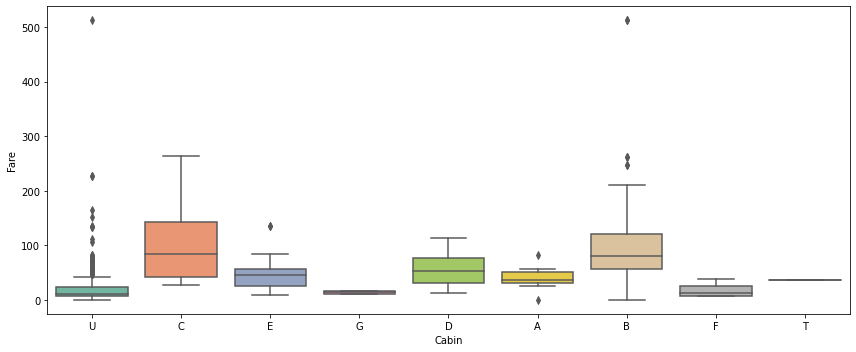

In [11]:
print('\nNull Values in training dataset \n{}'.format(train.isnull().sum()))

print('Summary of Cabin variable \n{}'.format(train['Cabin'].value_counts()))
print('Summary of Cabin variable \n{}'.format(test['Cabin'].value_counts()))

import seaborn as sns
plt.figure(figsize=(12,5))
sns.boxplot(x = 'Cabin', y = 'Fare', data = train, palette='Set2')
plt.tight_layout()

In [12]:
print('Mean Fare of Cabin B {}'.format(train[train['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(train[train['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(train[train['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(train[train['Cabin']=='E']['Fare'].mean()))
print('Mean Fare of Cabin G {}'.format(train[train['Cabin']=='G']['Fare'].mean()))
print('Mean Fare of Cabin A {}'.format(train[train['Cabin']=='A']['Fare'].mean()))
print('Mean Fare of Cabin F {}'.format(train[train['Cabin']=='F']['Fare'].mean()))
print('Mean Fare of Cabin T {}'.format(train[train['Cabin']=='T']['Fare'].mean()))

print('Mean Fare of Cabin B {}'.format(test[test['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(test[test['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(test[test['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(test[test['Cabin']=='E']['Fare'].mean()))
print('Mean Fare of Cabin G {}'.format(test[test['Cabin']=='G']['Fare'].mean()))
print('Mean Fare of Cabin A {}'.format(test[test['Cabin']=='A']['Fare'].mean()))
print('Mean Fare of Cabin F {}'.format(test[test['Cabin']=='F']['Fare'].mean()))
print('Mean Fare of Cabin T {}'.format(test[test['Cabin']=='T']['Fare'].mean()))

Mean Fare of Cabin B 113.50576382978724
Mean Fare of Cabin C 100.15134067796612
Mean Fare of Cabin D 57.24457575757576
Mean Fare of Cabin E 46.026693749999986
Mean Fare of Cabin G 13.58125
Mean Fare of Cabin A 39.623886666666664
Mean Fare of Cabin F 18.69679230769231
Mean Fare of Cabin T 35.5
Mean Fare of Cabin B 145.5627333333333
Mean Fare of Cabin C 121.03345999999999
Mean Fare of Cabin D 42.251276923076915
Mean Fare of Cabin E 84.92175555555555
Mean Fare of Cabin G 16.7
Mean Fare of Cabin A 44.71665714285714
Mean Fare of Cabin F 17.076050000000002
Mean Fare of Cabin T nan


In [13]:
def reassign_cabin(cabin_fare):
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    if cabin == 'U':
        if (fare >= 113.5):
            return 'B'
        if ((fare >=100.2) and (fare <= 113.5)):
            return 'C'
        if ((fare >= 57.2) and (fare <= 100.2)):
            return 'D'
        if ((fare >=46.0) and (fare <= 57.2)):
            return 'E'
        if ((fare >= 39.7) and (fare <= 46.0)):
            return 'A'
        else:
            return 'U'
    else:
        return cabin

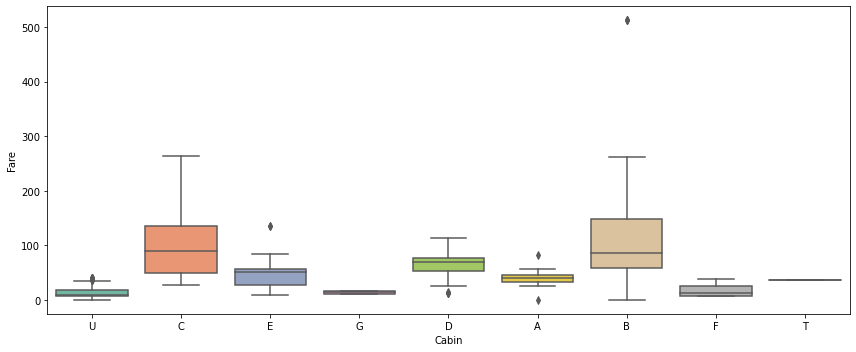

In [14]:
train['Cabin'] = train[['Cabin', 'Fare']].apply(reassign_cabin, axis=1)
test['Cabin'] = test[['Cabin', 'Fare']].apply(reassign_cabin, axis = 1)

plt.figure(figsize=(12,5))
sns.boxplot(x = 'Cabin', y = 'Fare', data = train, palette='Set2')
plt.tight_layout()

In [15]:
print('Mean Fare of Cabin X {}'.format(train[train['Cabin']=='X']['Fare'].mean()))
print('Summary of Cabin variable \n{}'.format(train['Cabin'].value_counts()))

Mean Fare of Cabin X nan
Summary of Cabin variable 
U    636
C     61
B     55
D     53
E     49
A     19
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [16]:
categories = {"female": 1, "male": 0}
train['Sex']= train['Sex'].map(categories)
test['Sex']= test['Sex'].map(categories)

library = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(library)
test['Embarked'] = test['Embarked'].map(library)

library = {"T" : 0, "G":1,"F":2,"A":3,"E":4,"D":5,"B":6,"C":7,"U":8}
train['Cabin'] = train['Cabin'].map(library)
test['Cabin'] = test['Cabin'].map(library)


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,8,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,7,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,8,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,7,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,8,1


In [17]:
ID = test['PassengerId']

In [18]:
train = train.drop(['Name','Ticket','PassengerId'], axis=1)
temp_test = test.drop(['Name','Ticket','PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,8,1
1,1,1,1,38.0,1,0,71.2833,7,2
2,1,3,1,26.0,0,0,7.9250,8,1
3,1,1,1,35.0,1,0,53.1000,7,1
4,0,3,0,35.0,0,0,8.0500,8,1


In [19]:
LABEL = 'Survived'
y = train[LABEL]

In [20]:
from sklearn.preprocessing import MinMaxScaler

dummy = 'Survived'
y = train[dummy]
train = train.drop(dummy, axis = 1)

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(temp_test)

scaled_train = pd.DataFrame(scaled_train, columns=train.columns, index=train.index)
scaled_test = pd.DataFrame(scaled_test, columns=temp_test.columns, index=temp_test.index)

scaled_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,0.0,0.271174,0.125,0.0,0.014151,1.000,0.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.875,0.5
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.000,0.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.875,0.0
4,1.0,0.0,0.434531,0.000,0.0,0.015713,1.000,0.0


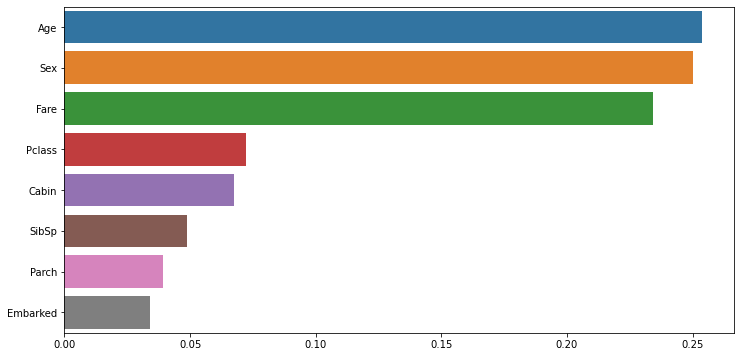

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=100)
clf.fit(scaled_train, y)

feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=feature_imp, y=feature_imp.index)

In [22]:
import random
random.seed(10)
new_train = scaled_train.drop(['Parch','Embarked'], axis=1)
new_test = scaled_test.drop(['Parch','Embarked'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(new_train, y, test_size = 0.2, random_state = 6, stratify = y)
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_predict = clf.predict(X_val)
print("Accuracy: {}".format(metrics.accuracy_score(y_val, y_predict)))

Accuracy: 0.8156424581005587


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_val, y_predict, cv=10)
scores.mean()

0.9166666666666666

In [25]:
scores

array([0.88888889, 0.94444444, 1.        , 0.94444444, 0.94444444,
       0.83333333, 0.77777778, 0.88888889, 0.94444444, 1.        ])

In [26]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.07


In [28]:

x_test = scaled_test.drop(['Parch','Embarked'], axis=1)
test_pred = clf.predict(x_test)
test_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [39]:
test['Survived'] = test_pred
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predict Survive,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,8,3,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,8,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,8,3,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,8,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,8,1,1,1


In [40]:
output = test[['PassengerId','Survived']]

In [41]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
output.to_csv("Titanic_predict.csv",index = False)